In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Load the required csv file
df = pd.read_csv("C:/Users/Joshua/Desktop/python_files/archive/HR_comma_sep.csv")
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [43]:
df.rename(columns={'satisfaction_level':'sl','last_evaluation':'lev','number_project':'numberproj','average_montly_hours':'amh','time_spend_company':'tsc','Work_accident':'wa','left':'left','promotion_last_5years':'pl','Department':'dept','salary':'sal'}, inplace=True)

In [44]:
# Get the colunms
df.columns

Index(['sl', 'lev', 'numberproj', 'amh', 'tsc', 'wa', 'left', 'pl', 'dept',
       'sal'],
      dtype='object')

In [45]:
# Getting the shape of my DataFrame
df.shape

(14999, 10)

In [6]:
# I Mapped my data here as pandas does not read strings
dataMapping ={
            "low": 1,
            "medium": 2,
             "high": 3,
             }

In [46]:
# Calling the map method to change the values 
df['sal'] = df['sal'].map(dataMapping)
df.head()

,sl,lev,numberproj,amh,tsc,wa,left,pl,dept,sal
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


<AxesSubplot:>

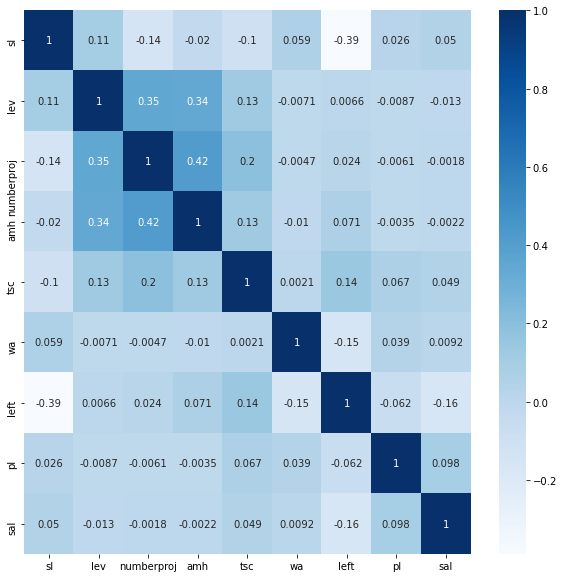

In [47]:
# Here I am getting the correlation btw the objects of the DataFrame(EDA-Exploratory Data Analysis)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


In [11]:
# Positive Correlation:
# le-numberproj,amh
# amh-le,numberproj
# numberproj-le,amh

# Negative Correlation:
# left-sl

In [48]:
df['amh'].mean()

201.0503366891126

In [49]:
df['numberproj'].mean()

3.80305353690246

In [50]:
df['lev'].mean()

0.7161017401159978

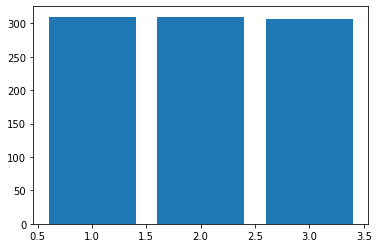

In [51]:
plt.bar(x=df['sal'], height=df['amh'])
plt.show()

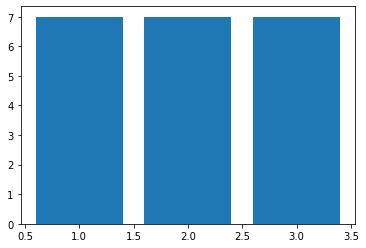

In [52]:
plt.bar(x=df['sal'], height=df['numberproj'])
plt.show()

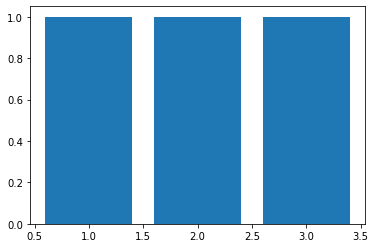

In [53]:
plt.bar(x=df['sal'], height=df['lev'])
plt.show()

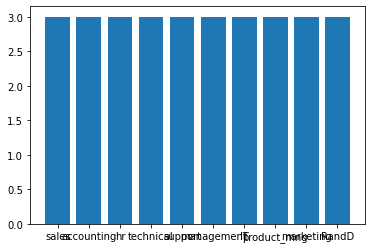

In [28]:
plt.bar(x=df['dept'], height=df['sal'])
plt.show()

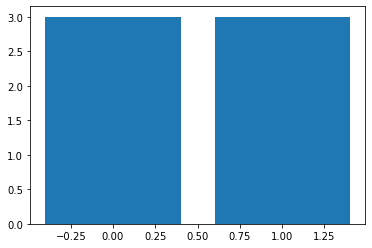

In [54]:
plt.bar(x=df['left'], height=df['sal'])
plt.show()

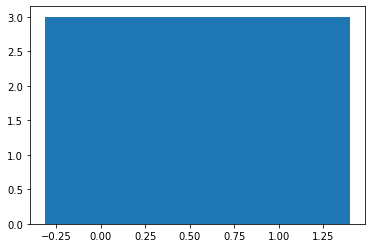

In [55]:
plt.bar(x=df['sl'], height=df['sal'])
plt.show()

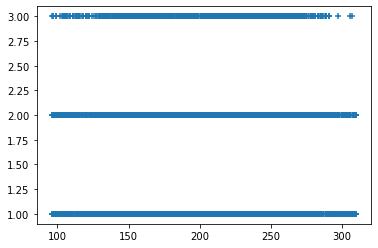

In [30]:
plt.scatter(df.amh,df.sal,marker='+')
plt.show()

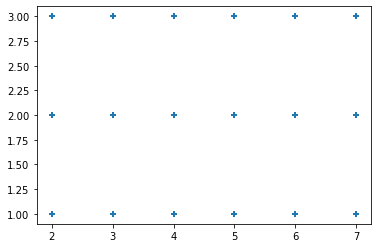

In [31]:
plt.scatter(df.numberproj,df.sal,marker='+')
plt.show()

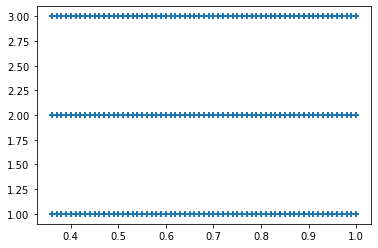

In [56]:
plt.scatter(df.lev,df.sal,marker='+')
plt.show()

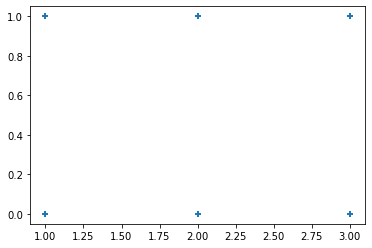

In [58]:
plt.scatter(df.sal,df.left,marker='+')
plt.show()

In [60]:
df.shape

(14999, 10)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df[['sal']]
X

,sal
0,1
1,2
2,2
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [63]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df[['sal']],df.left,test_size=0.1,random_state=10)

In [69]:
X_test

,sal
13982,1
822,1
13751,2
9656,2
13497,2
...,...
5946,2
285,1
7058,2
6277,1


In [70]:
X_train

,sal
9292,2
9307,2
4017,1
14501,1
9243,1
...,...
11633,3
1344,1
12815,1
7293,2


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
model.score(X_test,y_test)

0.7686666666666667

In [77]:
model.predict_proba(X_test)

array([[0.69374988, 0.30625012],
       [0.69374988, 0.30625012],
       [0.81295757, 0.18704243],
       ...,
       [0.81295757, 0.18704243],
       [0.69374988, 0.30625012],
       [0.69374988, 0.30625012]])